<a href="https://colab.research.google.com/github/mvkumar14/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



##  1) Write a Function
**This is a very specific case** that we are working with 
The name of the function gives us the case invovled

**Specifically:**
You take a breathalizer test(1 test).The result comes back positive, what is the likelihood that this test is "True" and you are actually drunk
_________________________________________________________________________
**Givens:**
True positive rate = 100%

False positive rate = 8%

Belief about drunk driving in the population = 1/1000 

(This is what we use as our first guess of prob_drunk_prior)

**Function Input:**
prob_drunk_prior
false_positive_rate

**Function Ouput:**
The probability that the positive you got was a "true positive" (What are the chance that you are actually drunk given just this test information and nothing else)

________________________________________________________________________
**Holdup....**

Wait... wasn't the true positive rate already given ? It looks like we are looking for something we already have. Why do we want this value?

Yes... we were given a true positive rate, but here we want something sliiightly different. We want the probability that an event (the breathalizer test returning a + or "you are drunk" value) means true positive. Remember when the breathalizer says (+) there is a still a chance that you are sober, but the test was flawed.  

Here it is once again stated explicitly:

**The true positive rate given at the beginning of the problem is:**
Given that you are drunk what is the probability that the breathalizer 
will give you a positive (correctly predict that you are drunk). In our case this is 100%

**Here the question we ask is:**
Given that the breathalizer resulted in a positive value (the test says you are drunk) what is the probability that it is correct. In other words, what is the probability that it is a true positive



Here is our tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

Here it is for our specific situation:

$$P(Drunk|+ test) = \frac{P(+ test|Drunk)P(Drunk( in-general-populace))}{P(+ test)}$$

In [0]:
#P(Drunk|+ test) = (P(+ test|Drunk)*P(Drunk (in general populace))) / P(+ test)
# P(+ test)= ((+) from drunk group  +  (+) from non-drunk group)/population
#^ the better way to write the above is : 
# P(+ test) = ((+)drunks)

def prob_drunk_given_positive(prob_drunk_prior,false_positive_rate):
  """
  Note that for this function to work properly you need to input 
  values as fractions. 
  """
  #these are knowns, but they can be turned variable:
  true_positive_rate = 1
  

  #numerator= probability of real drunk in full set
  prob_real_drunks = prob_drunk_prior*true_positive_rate
  

  #denom = probability of + occuring in full set
  #some positives are from the "drunk" set
  prob_pos_drunks = prob_real_drunks

  #some positives are due to the error in the "sober" set
  prob_pos_sober = (1-prob_drunk_prior)*false_positive_rate
  #chance of sober = 1-chance drunk
  #chance of + with in sober set = error rate of test


  #actual denom calculated
  prob_all_positives =prob_pos_drunks + prob_pos_sober

  #total probability is: chance of real drunk/chance of all + values
  probability = prob_real_drunks/prob_all_positives
  return probability   

In [0]:
prob_drunk_given_positive(1/1000,0.08)

0.012357884330202669

### The following was a failed test, that was probably uneccessary:

In [0]:
#now a for loop to loop through the previous funciton n times:
starting_base_rate = 1/1000
false_positive_error = 0.08

#REMEMBER TO DO THE RETURNS RIGHT IN RECURSIVE STUFF!!!!

def run_prob_sequentially(num_repeats,starting_base_rate,false_positive_error):
  print(starting_base_rate)
  if num_repeats == 1:
     #print("right before return statement",starting_base_rate)
     return starting_base_rate
  elif num_repeats > 1:
    # print('loop',num_repeats)
    new_base_rate = prob_drunk_given_positive(starting_base_rate,false_positive_error)
    return run_prob_sequentially(num_repeats-1,new_base_rate,false_positive_error)
  

I had an issue with this where I would be able to print out the print statements, but the function wouldn't return the proper value. The problem was that the else loop called the original function instead of "returning" the original function. So the first time that the function was called recursivley it went through the rest of the process, but the values weren't doing anything in the main function.

In [0]:
#test that the function is working properly. (uncomment print statements in function
# if necessary)
a = run_prob_sequentially(4,starting_base_rate,false_positive_error)
# print(a[1])


0.001
0.012357884330202669
0.13525210993291495
0.6615996951348605


In [0]:
def test_fun(a,b):
  if b>2:
    return a

In [0]:
test_val = test_fun(1,3)
print(test_val)

1


## Plotting my results:

In [0]:
def seq_data_points(starting_base_rate,false_positive_error,num_datapoints):
  y = []
  x = range(num_datapoints)
  #this is the simpler way of doing the recursion thing. 
  #recursion is the cooler way of doing this, but unneccessary 
  for i in range(num_datapoints):
    starting_base_rate = prob_drunk_given_positive(starting_base_rate,false_positive_error)
    y.append(starting_base_rate)
  return x,y


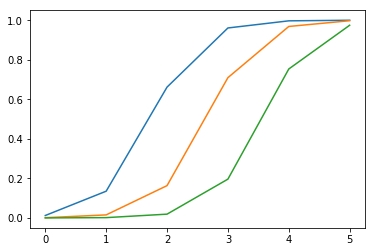

In [0]:
import matplotlib.pyplot as plt

starting_base_rate = 1/1000
false_positive_error = 0.08
num_datapoints = 6

# #start stop, and number of graphs you want to plot
# #start and stop are for base rate values
# scale = 1/1000
# num_graphs = 3


base_rate_array = [1/1000,1/10000,1/100000]
for i in base_rate_array:
  x,y = seq_data_points(i,false_positive_error,num_datapoints)
  plt.plot(x,y)


## More Robust Version of the function. 

I want to write this function so that the inputs are:

*   false_positive_error
*   false_negative_error
*   initial_guess
*   population size? (if I want to give a numerical representation of results in additon to a statistical representation of results)
*   probability specification (input 1 or 2 for A given B or B given A)
(might be better to write that last one as seperate functions, cause inputs might need to be different for both?)


## 2 Explore ```scipy.stats.bayes_mvs```



### Getting the data

In [30]:
# Import the congressional voting records data
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

--2019-10-10 16:14:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-10-10 16:14:50 (590 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [31]:
import pandas as pd
import numpy as np

congress=pd.read_csv('house-votes-84.data',header=None,
                      names=['handicapped-infants','water-project',
                      'budget-resolution','physician-fee-freeze',
                      'el-salvador-aid','relegious-groups',
                      'anti-sat-test-ban','aid',
                      'mx-missile','immigration',
                      'synfuels-corp','education-spending',
                      'superfund','crime','exports','export-sa'])
congress.head()

,handicapped-infants,water-project,budget-resolution,physician-fee-freeze,el-salvador-aid,relegious-groups,anti-sat-test-ban,aid,mx-missile,immigration,synfuels-corp,education-spending,superfund,crime,exports,export-sa
republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [32]:
congress = congress.replace({'?':np.nan,'y':1,'n':0})
congress.head()


,handicapped-infants,water-project,budget-resolution,physician-fee-freeze,el-salvador-aid,relegious-groups,anti-sat-test-ban,aid,mx-missile,immigration,synfuels-corp,education-spending,superfund,crime,exports,export-sa
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [33]:
 print(congress.isnull().sum())

handicapped-infants      12
water-project            48
budget-resolution        11
physician-fee-freeze     11
el-salvador-aid          15
relegious-groups         11
anti-sat-test-ban        14
aid                      15
mx-missile               22
immigration               7
synfuels-corp            21
education-spending       31
superfund                25
crime                    17
exports                  28
export-sa               104
dtype: int64


In [34]:
reps = congress[(congress.index=='republican')]
reps.head()

,handicapped-infants,water-project,budget-resolution,physician-fee-freeze,el-salvador-aid,relegious-groups,anti-sat-test-ban,aid,mx-missile,immigration,synfuels-corp,education-spending,superfund,crime,exports,export-sa
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [35]:
dems = congress[(congress.index=='democrat')]
dems.head()

,handicapped-infants,water-project,budget-resolution,physician-fee-freeze,el-salvador-aid,relegious-groups,anti-sat-test-ban,aid,mx-missile,immigration,synfuels-corp,education-spending,superfund,crime,exports,export-sa
democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [36]:
reps['aid'].isnull().sum()

11

In [37]:
reps['aid'].describe()

count    157.000000
mean       0.152866
std        0.361010
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: aid, dtype: float64

### Visuals:

In [0]:
from scipy import stats
def confidence_interval(data,confidence=0.95):
  m = data.mean()
  s = data.sem()
  confidence = 0.99
  t = stats.t.ppf((1+confidence)/2,(len(data)-data.isnull().sum()))
  error = s*t
  return (m, m-error, m+error)

In [0]:
from scipy.stats import norm

def gauss_plot_direct(my_mean,my_stdev,color = 'b',out =1,scale =1):
  lb = (my_mean-(my_stdev*out))
  ub = (my_mean+(my_stdev*out))
  x_axis = np.arange(lb,ub,0.01)
  plt.plot(x_axis,norm.pdf(x_axis,my_mean,my_stdev),color =color)
  return

In [78]:
reps.head()

,handicapped-infants,water-project,budget-resolution,physician-fee-freeze,el-salvador-aid,relegious-groups,anti-sat-test-ban,aid,mx-missile,immigration,synfuels-corp,education-spending,superfund,crime,exports,export-sa
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [85]:
#Here is how I select the data for the visuals down below
column = 'aid'
dem_data = dems[column].dropna()
rep_data = reps[column].dropna()
rep_mvs = stats.bayes_mvs(rep_data,alpha = 0.9)
dem_mvs = stats.bayes_mvs(dem_data,alpha = 0.9)
rep_mvs[0]

Mean(statistic=0.15286624203821655, minmax=(0.10519203191822998, 0.2005404521582031))

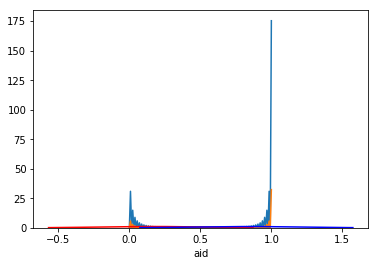

In [88]:
import seaborn as sns

fig, ax = plt.subplots();

sns.distplot(dem_data,bins=2);
sns.distplot(rep_data,bins=2);

#This is the gaussian distribution of my data
gauss_plot_direct(rep_data.mean(),rep_data.std(),out=2,color='r' )
gauss_plot_direct(dem_data.mean(),dem_data.std(),out=2,)
# plt.axvline(m,color='black'd')
#Here I draw the gauss with the values collected from mvs

# reps['water-project'].hist()
# dems['water-project'].hist()

## Confidence interval representation

Now lets ask a question. There are two types of questions I have asked for this dataset


## Difference between Bayesian and Frequentist statistics



The core assumption for bayes comes from the fact that you have a prior value. This prior value, I would assume, is often determined with frequentist statistics. How else are you going to have a good guess as to how many drunks there are compared to the average population? You can't use bayes on the dataset that would give you that value. You would have to use frequentist statistics

Bayes is useful when you have prior information about a specific situation. 

Bayes is useful when you have a measurement/ indicator, but you are aware that the measurement/ indicator has some error in it.

For example in the dataset with the politicians, you don't really  have any "error". It isn't like some of the democrats who voted yes "accidentally" voted yes. So, if I'm understanding the use case for bayes properly, there would be no point in modeling using bayes. On the other hand say there was a certain amount of measurement error in a device like an accelerometer. I have a fitbit. The screen of the fitbit only turns on when I raise my hand(as if I'm looking at it), but in certain cases I want to look at at, and I perform the motion, but nothing happens. I have to "reset" and try again before the screen shows. I think a situation like this could be modeled as "two events" with some level of conditional probability. You have accelerometer data as input to an algorithim that then has to decide if it should turn the screen on or not. a

Another part of bayes seems to be "linked" information. The formats of the probabilities that I see used here 

 You account for the error with bayes, and you don't for frequentist "Base" calculations. This error is "accounted for" by the confidence interval. It isn't perfectly accounted for, but it is accounted for in the sense  

To be perfectly clear both bayes and frequentist statistics sill have some sort of "error bars" or "i
neither asserts an absolute value. They both awknowledge that there

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!